# CNN to classify Cifar-10 dataset (Images)



So far, we saw how to build a Dense Neural Network (DNN) that classified images of digits (MNIST) or even fashion images (Fashion-MNIST). Here we will instead, recognize the 10 classes of CIFAR ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship' and 'truck'). There are some key differences between these two image datasets that we need to take into account. 

First, while MNIST were 28x28 monochrome images (1 color channel), CIFAR is 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object centered in the image, with no background. Conversely, CIFAR ones are not centered and can have the object with a background, such as airplanes that might have a cloudy sky behind them! Those differences are the main reason to use a CNN instead of a DNN. 

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

## Import and Inspect Dataset

Cifar-10 repository: https://www.cs.toronto.edu/~kriz/cifar.html





In [2]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


- The image data shape is: `(#images, img_heigth, img_width, #channels)`, where channels are in RGB format (red, green, blue). 
- The labels shape is `(#images, label)`, where label goes from 0 to 9.


In [9]:
train_images[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

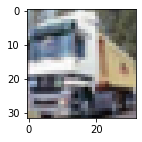

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[1]);

In [11]:
train_labels[1][0]

9

    The CIFAR labels happen to be arrays, which is why you need the extra index

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
class_names[9] # The List's index is the label

'truck'

In [14]:
idx = train_labels[1][0]
class_names[idx]

'truck'

	 truck


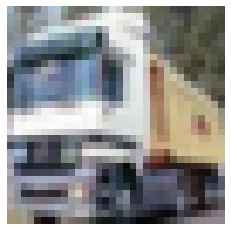

In [15]:
print("\t", class_names[train_labels[1][0]])
plt.imshow(train_images[1])
plt.axis('off');

In [16]:
 def plot_train_img(img, size=2): 
    label = train_labels[img][0]
    plt.figure(figsize=(size,size))
    print("Label {} - {}".format(label, class_names[label]))
    plt.imshow(train_images[img])
    plt.axis('off')
    plt.show()

Label 9 - truck


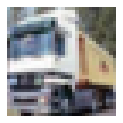

In [17]:
plot_train_img(1)

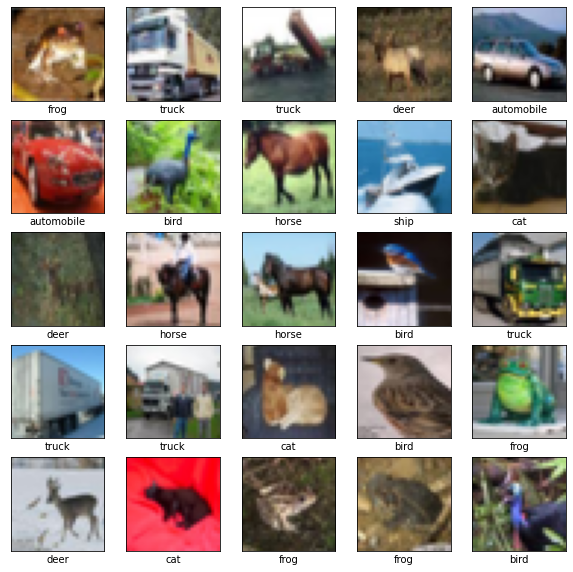

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Note that images are in color, not centered and with different backgrounds

## Preprocessing dataset

In [19]:
test_images.max()

255

In [20]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [21]:
test_images.max()

1.0

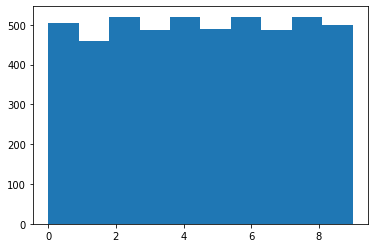

In [22]:
plt.hist(train_labels[:5_000]);

In [23]:
val_images = train_images[:5_000]
val_labels = train_labels[:5_000]
print(val_images.shape, val_labels.shape)

(5000, 32, 32, 3) (5000, 1)


In [24]:
train_images = train_images[5_000:]
train_labels = train_labels[5_000:]
print(train_images.shape, train_labels.shape)

(45000, 32, 32, 3) (45000, 1)


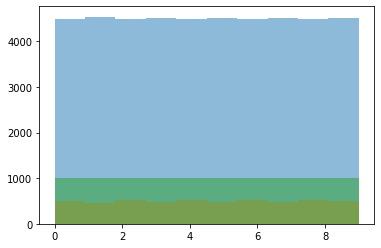

In [25]:
plt.hist(train_labels, alpha=0.5)
plt.hist(val_labels, alpha=0.5)
plt.hist(test_labels, alpha=0.5);

## Create Model Arquitecture and Compile

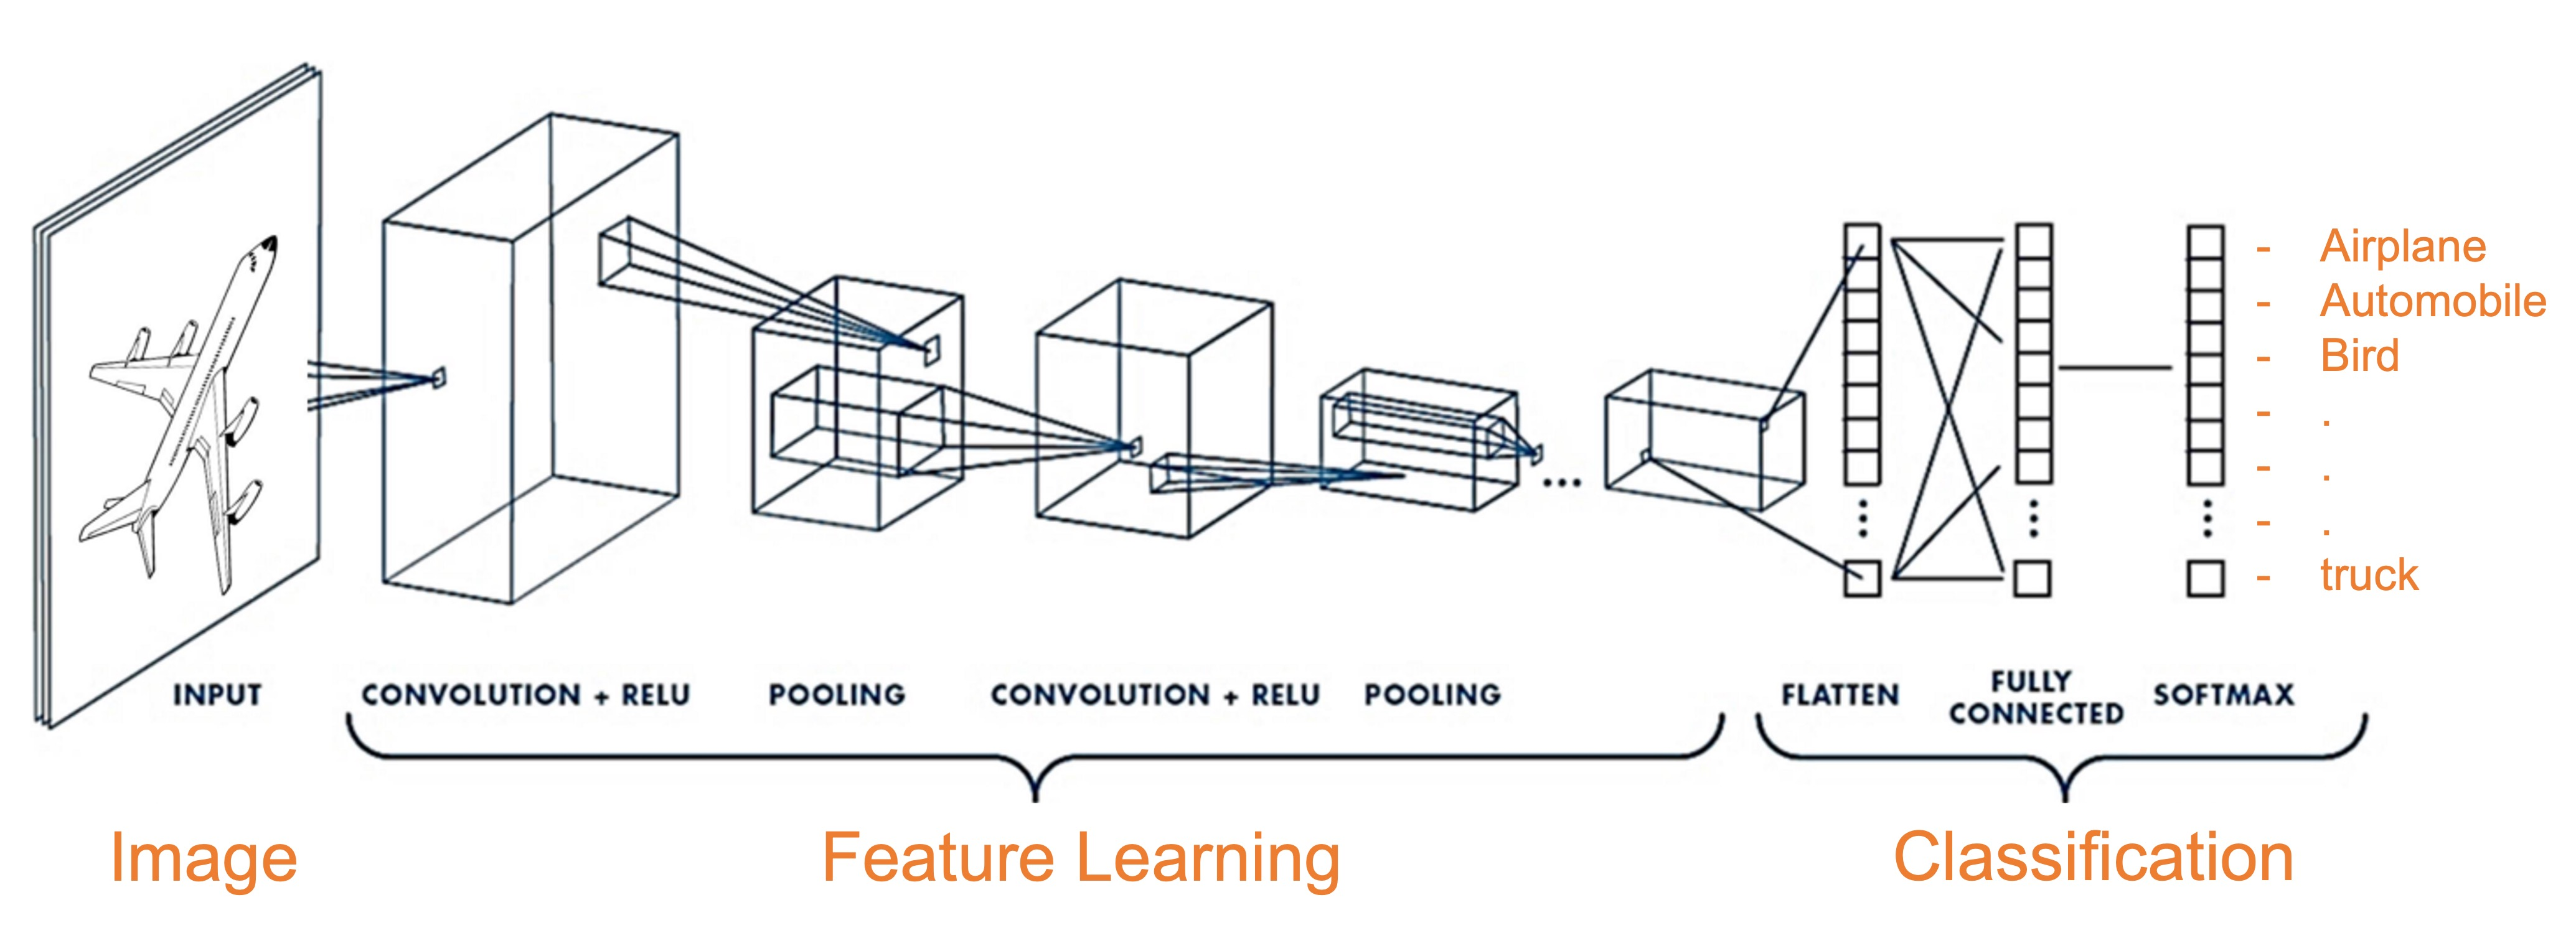

On [Convolution layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), 
- strides is an integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Default (1,1).
- padding: one of "valid" or "same" (case-insensitive). Default = 'valid'.
  - "valid" means no padding.  
  - "same" results in padding with zeros evenly
to the left/right or up/down of the input such that output has the same


In [26]:
model = Sequential()

model.add(Conv2D(
    input_shape=(32, 32, 3),
    filters=32, 
    kernel_size=(3,3), 
    activation='relu')
)
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [27]:
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

## Training

In [28]:
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy

In [29]:
# Fit the model
history = model.fit(train_images, 
                    train_labels, 
                    epochs=NUM_EPOCHS, 
                    validation_data=(val_images, val_labels)
)

Epoch 1/20
1407/1407 [==============================] - 19s 7ms/step - loss: 1.4900 - accuracy: 0.4625 - val_loss: 1.2232 - val_accuracy: 0.5650
Epoch 2/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1296 - accuracy: 0.6016 - val_loss: 1.0805 - val_accuracy: 0.6220
Epoch 3/20
1407/1407 [==============================] - 9s 7ms/step - loss: 0.9898 - accuracy: 0.6542 - val_loss: 0.9690 - val_accuracy: 0.6636
Epoch 4/20
1407/1407 [==============================] - 9s 7ms/step - loss: 0.9030 - accuracy: 0.6860 - val_loss: 0.9656 - val_accuracy: 0.6718
Epoch 5/20
1407/1407 [==============================] - 9s 7ms/step - loss: 0.8351 - accuracy: 0.7105 - val_loss: 0.9152 - val_accuracy: 0.6824
Epoch 6/20
1407/1407 [==============================] - 9s 7ms/step - loss: 0.7696 - accuracy: 0.7325 - val_loss: 0.9426 - val_accuracy: 0.6744
Epoch 7/20
1407/1407 [==============================] - 9s 7ms/step - loss: 0.7225 - accuracy: 0.7487 - val_loss: 0.8989 - val_accuracy

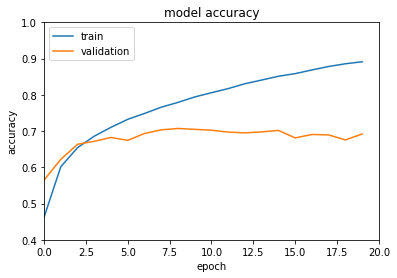

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

## Evaluate Model

In [32]:
print("Train data: ", model.evaluate(train_images, train_labels)[1])
print("Eval data: ", model.evaluate(val_images, val_labels)[1])
print("Test data: ", model.evaluate(test_images, test_labels)[1])

1407/1407 [==============================] - 6s 4ms/step - loss: 0.2313 - accuracy: 0.9199
Train data:  0.9198889136314392
157/157 [==============================] - 1s 4ms/step - loss: 1.2736 - accuracy: 0.6920
Eval data:  0.6919999718666077
313/313 [==============================] - 1s 4ms/step - loss: 1.3474 - accuracy: 0.6807
Test data:  0.6807000041007996


**Accuracy**
- Train: +90%; 
- Validation: 68%-70% 
- Test: 66%-68%

In [33]:
predictions = np.argmax(model.predict(test_images), axis=-1)
predictions.shape

(10000,)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(test_labels, predictions, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.72      0.72      0.72      1000
  automobile       0.85      0.76      0.80      1000
        bird       0.49      0.64      0.56      1000
         cat       0.50      0.47      0.48      1000
        deer       0.65      0.60      0.63      1000
         dog       0.57      0.59      0.58      1000
        frog       0.77      0.75      0.76      1000
       horse       0.75      0.71      0.73      1000
        ship       0.81      0.79      0.80      1000
       truck       0.77      0.77      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [36]:
confusion_matrix(test_labels,predictions)

array([[719,  20,  88,  19,  24,  13,  11,  12,  58,  36],
       [ 33, 761,  21,  17,   4,   7,   9,   3,  34, 111],
       [ 52,   3, 640,  59,  70,  71,  51,  35,  13,   6],
       [ 23,   5,  98, 469,  85, 186,  63,  38,  22,  11],
       [ 25,   4, 127,  56, 604,  58,  53,  65,   6,   2],
       [ 12,   1, 100, 176,  43, 588,  20,  43,   9,   8],
       [  7,   5,  90,  61,  31,  35, 747,  12,   6,   6],
       [ 20,   2,  71,  43,  60,  64,   6, 712,   6,  16],
       [ 62,  32,  38,  21,   3,   7,   4,  10, 793,  30],
       [ 40,  59,  24,  15,   8,  10,  12,  25,  33, 774]])

In [37]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

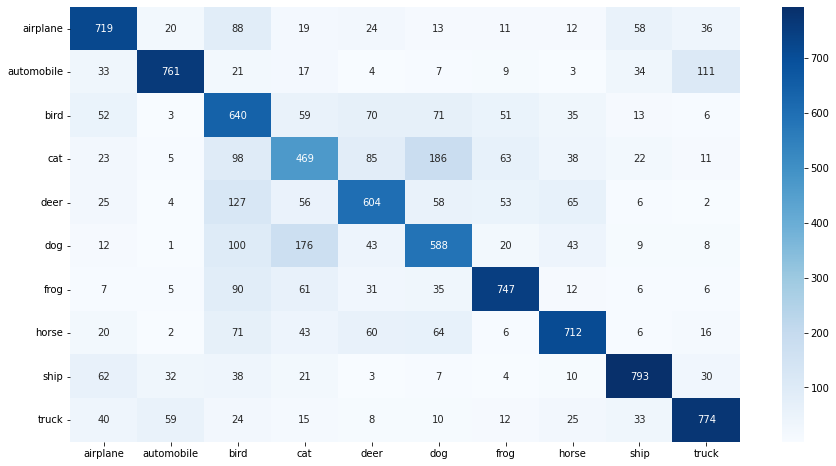

In [39]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(test_labels,predictions), cmap='Blues', annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names);

## Testing Model (Predicting)

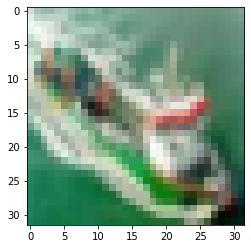

In [40]:
plt.imshow(test_images[15]);

In [41]:
test_labels[15][0]

8

In [42]:
class_names[8]

'ship'

In [43]:
test_images[15].shape

(32, 32, 3)

The input Tensor shape should be: (num_images, width, height, color_channels)

In [44]:
my_image = test_images[15]
my_image = my_image.reshape(1,32,32,3)
my_image.shape

(1, 32, 32, 3)

In [45]:
img_pred = np.argmax(model.predict(my_image))
class_names[img_pred]

'ship'

In [46]:
def img_pred(img, size=4):
    label = test_labels[img][0]
    my_image = test_images[img]
    plt.figure(figsize=(size,size))
    plt.imshow(my_image)
    my_image = my_image.reshape(1,32,32,3)
    img_pred = np.argmax(model.predict(my_image))
    pred_label = class_names[img_pred]
    print(" Label {} <=> Pred: {}".format(class_names[label], pred_label))
    plt.grid(False)
    plt.axis('off')
    plt.show()

 Label ship <=> Pred: ship


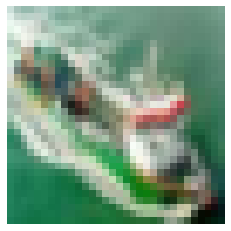

In [48]:
img_pred(15)

 Label cat <=> Pred: cat


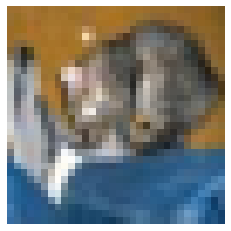

In [49]:
img_pred(0)

 Label ship <=> Pred: ship


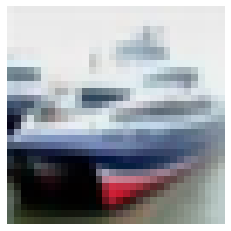

In [50]:
img_pred(1)

 Label ship <=> Pred: ship


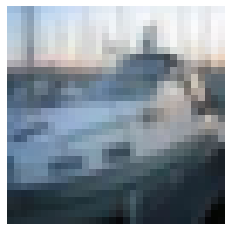

In [51]:
img_pred(2)

 Label airplane <=> Pred: airplane


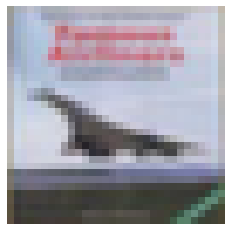

In [52]:
img_pred(3)

 Label frog <=> Pred: frog


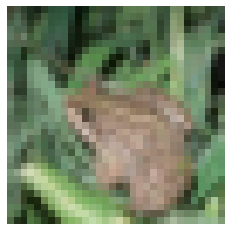

In [53]:
img_pred(4)

 Label frog <=> Pred: frog


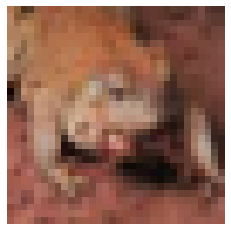

In [54]:
img_pred(5)

## Saving the model

In [55]:
!pwd # Linux command, shows where we are in CoLab's folders

/content


In [ ]:
model.save('cifar_10_model.h5')

Use [Netron](https://netron.app) to visualize the model, hyperparameters, tensor shapes, etc. Netron is a viewer for neural network, deep learning and machine learning models (See [GitHub](https://github.com/lutzroeder/netron) for instructions about instalation in your desktop). 